In [ ]:
!pip install git+https://github.com/maxtuno/peqnp-lib
!pip install numpy
!pip install matplotlib
!pip install networkx

In [1]:
import sys
import random
import numpy
import peqnp
import networkx
import matplotlib.pyplot as plt
%matplotlib inline

[8, 2, 9, 3, 7, 6, 1, 5, 4, 0]


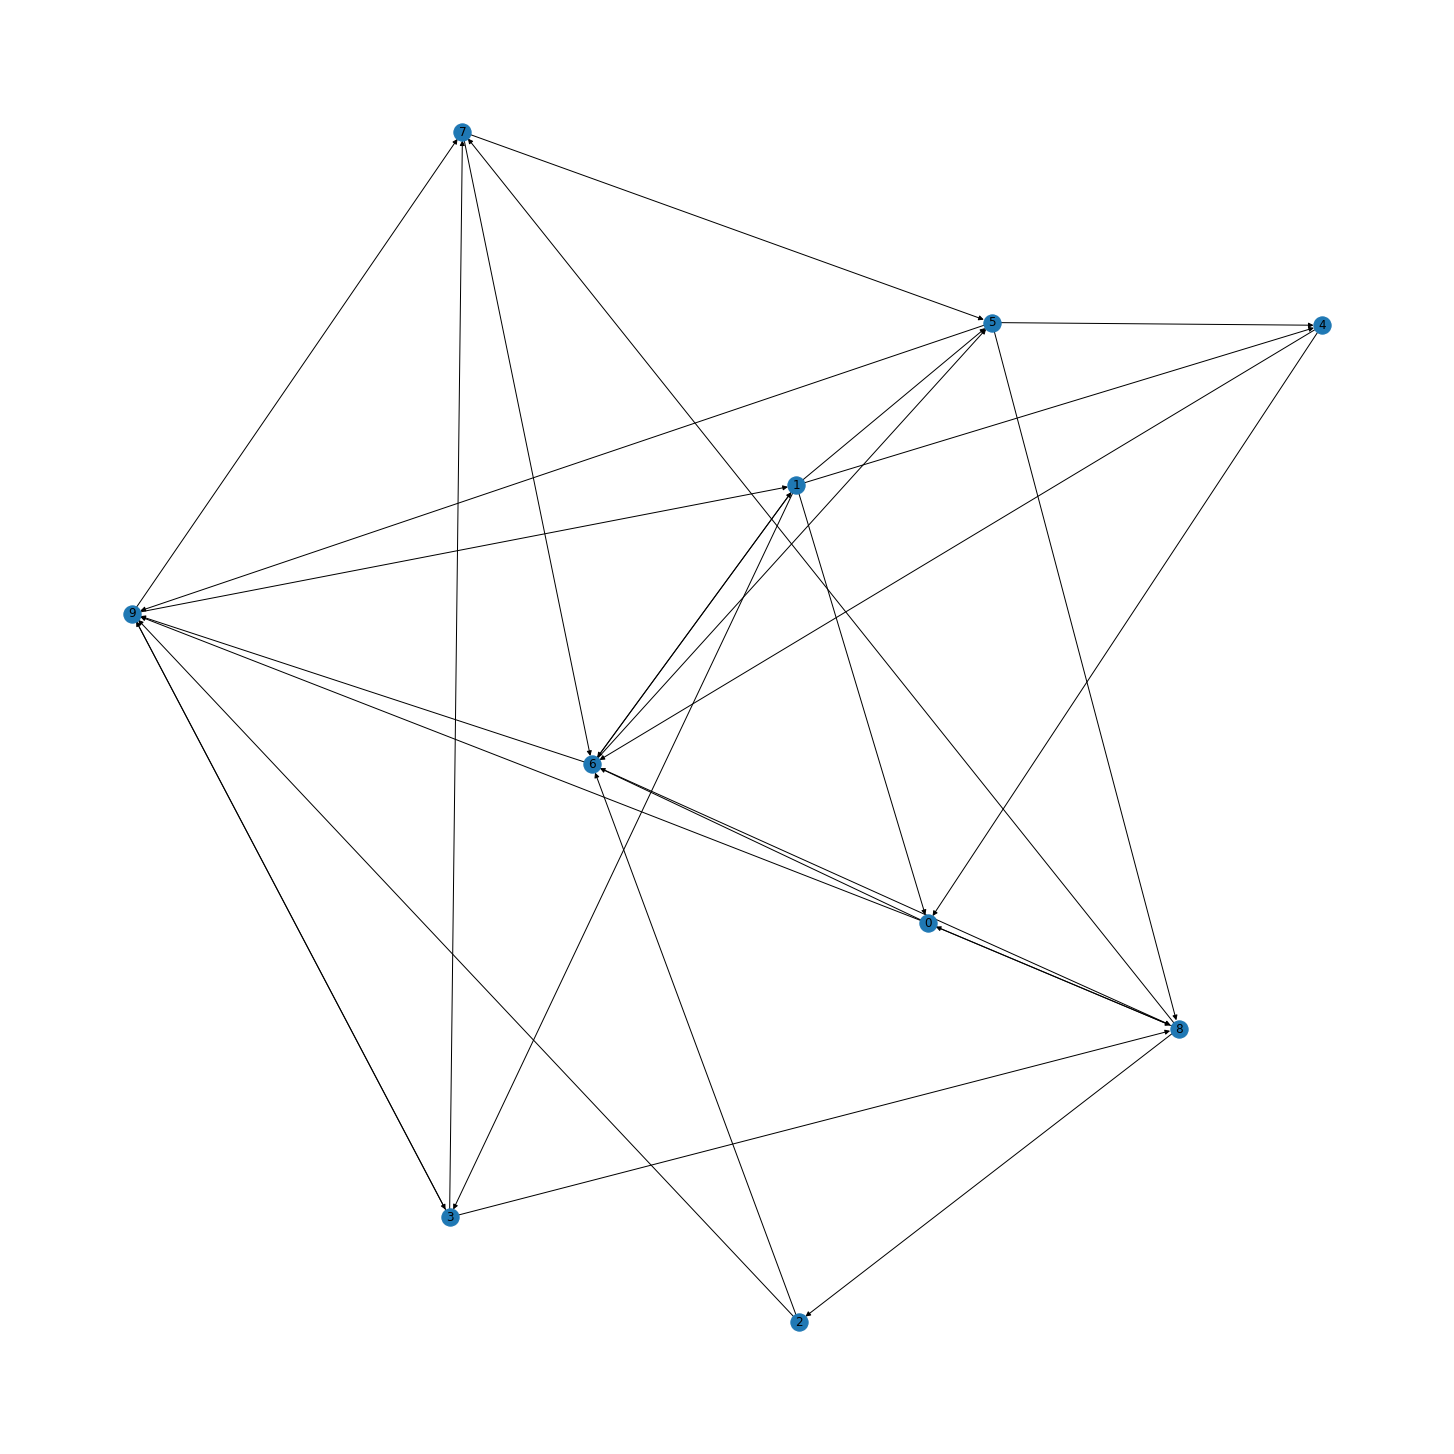

In [2]:
n = 10

matrix = numpy.random.randint(0, 2, size=(n, n)) * numpy.random.randint(0, 2, size=(n, n)) # * numpy.random.randint(0, 2, size=(n, n))

# Ensure hamiltonian cycle exist (comment for absolutely random)
seq = list(range(n))
random.shuffle(seq)
for i in range(n):
    matrix[seq[i]][seq[(i + 1) % n]] = 1
print(seq)
seq.clear()

plt.figure(figsize=(20, 20))
g = networkx.DiGraph(matrix)
pos = networkx.spring_layout(g)
networkx.draw(g, pos=pos)
networkx.draw_networkx_labels(g, pos=pos, labels={i:i for i in range(n)})
plt.show()

[5, 4, 0, 6, 8, 2, 9, 1, 3, 7]


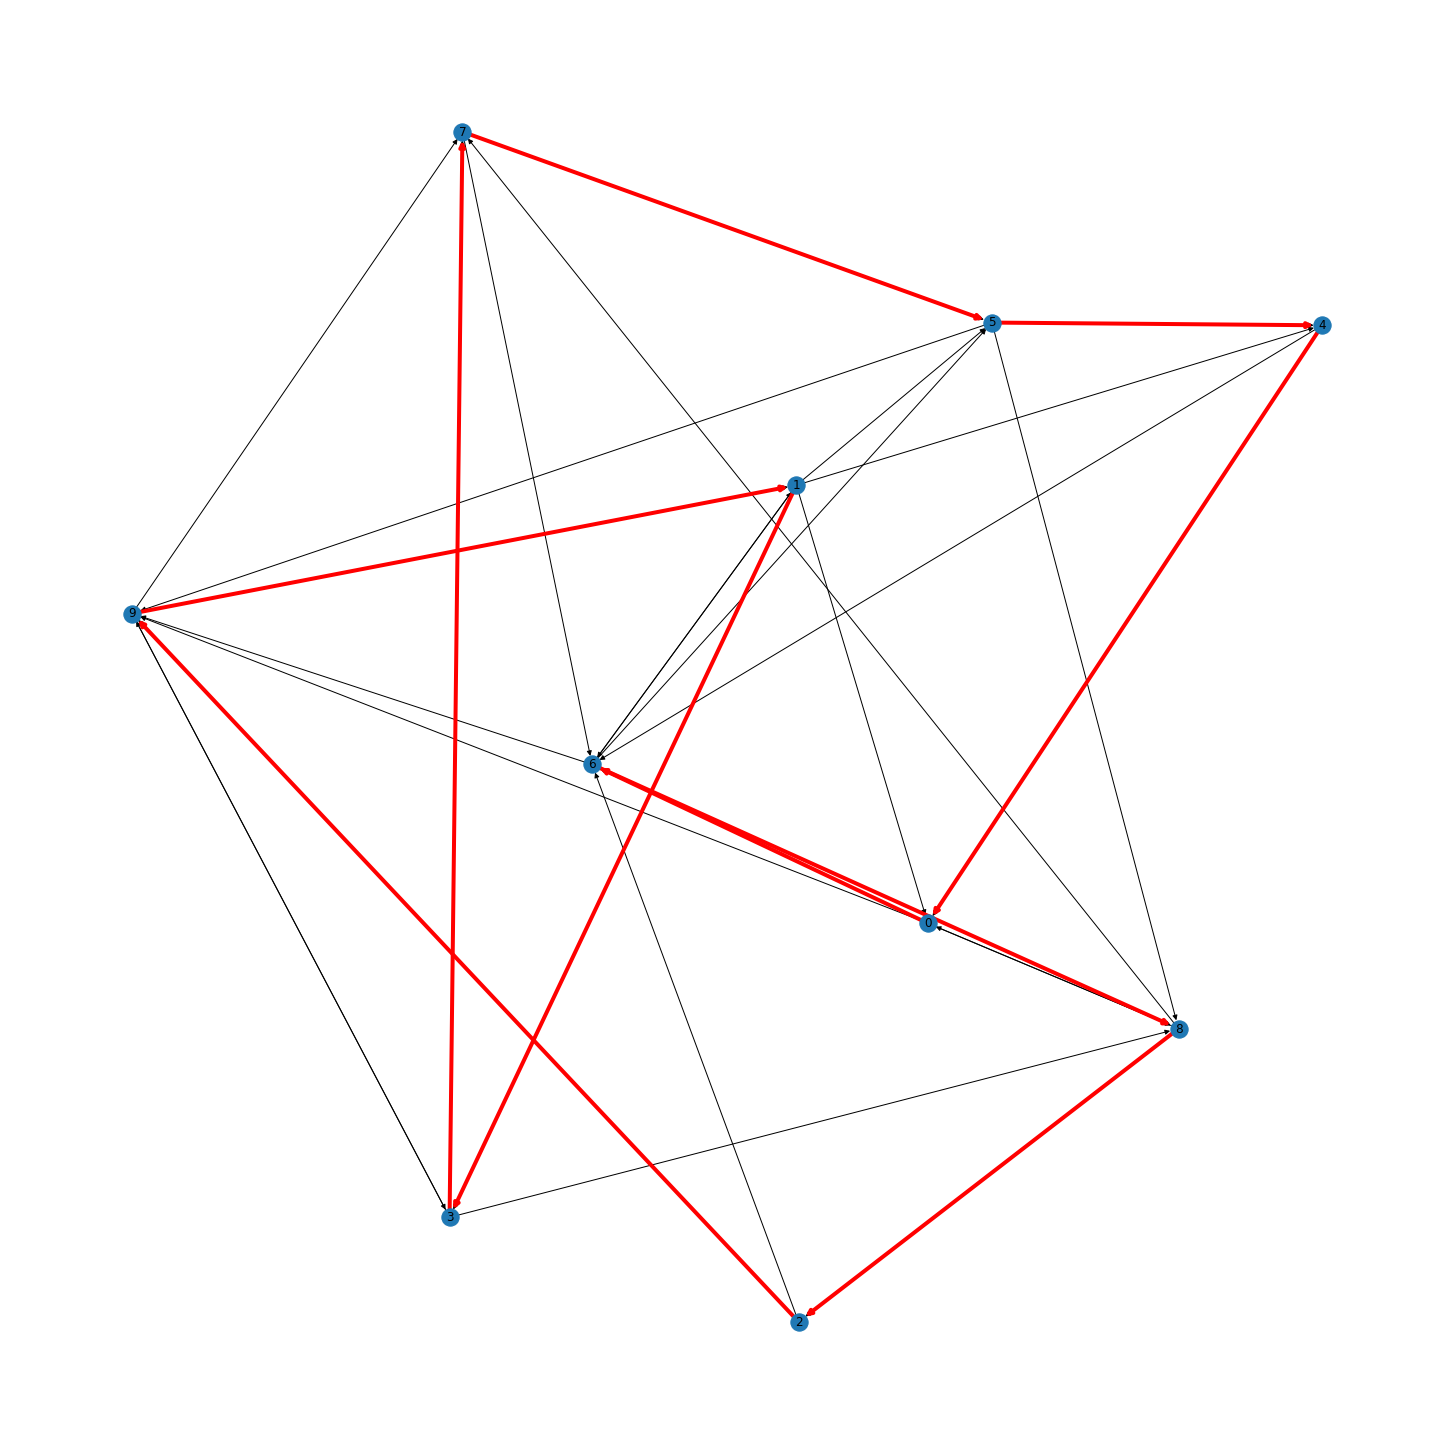

In [3]:
tc = peqnp.TheCore(bits=(n ** 2).bit_length(), key='hcp', folder='db/')

xs = tc.array(n)
ys = tc.array(n)

tc.indexing(xs, ys, matrix.flatten())

tc.apply(xs, single=lambda x: x < n)
tc.apply(xs, dual=lambda x, y: x != y)

assert sum(ys) == n

if tc.satisfy(xs + ys):
    _xs = tc.values(xs)
    _hs = numpy.zeros_like(matrix)
    print(_xs)
    plt.figure(figsize=(20, 20))
    networkx.draw(g, pos=pos)
    networkx.draw_networkx_labels(g, pos=pos, labels={i:i for i in range(n)})
    networkx.draw_networkx_edges(g, pos=pos, edgelist=[(_xs[n - 1], _xs[n]) for n in range(len(_xs))], edge_color='red', width=4)
    plt.show()
elif tc.unsat:
    print('Infeasible...')